<a href="https://colab.research.google.com/github/Med-Rokaimi/mytest/blob/main/Crude_Oil_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crude Oil Prices Analysis 

This notebook is to explore and analyze the daily crude oil price data from Bloomberg over the time period 2000 - 2023. The main purpose of this analysis is to perform statistical analysis to study the nature of the historical prices of crude oil to explore opportunities for applying new models that could provide the best forecasting results for crude oil prices.



*   Data Preparation 
*   Exploratory Data Analysis
*   Multivirate Analysis








In [1]:
#import packages 
import numpy as np
import pandas as pd
import numpy.random as rng
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as tg
from pathlib import Path
from datetime import date


%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]

# Dataset Preparation

The dataset has been downloaded from Bloomberge for the crude oil prices duration the period (04 January 2000 - 17 april 2023). The excel file contains three columns: 


1.   Dates: daily date
2.   PX_LAST: the daily prices
3. volume 





In [2]:
#Importing the data
DATAPATH = '/content/gdrive/MyDrive/UNIVR/DataSet/BloombergCrudeOil/crude_oil_price_volume.xlsx'

from google.colab import drive
drive.mount('/content/gdrive')

#read only the dates and prices
fields = ['Dates', 'PX_LAST']
data= pd.read_excel(DATAPATH , usecols=fields , parse_dates= True)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data.head(3)

,Dates,PX_LAST
0,2000-01-04,24.39
1,2000-01-05,23.73
2,2000-01-06,23.62


In [4]:
#Dataset Description
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    5994 non-null   datetime64[ns]
 1   PX_LAST  5979 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 93.8 KB


In [5]:
#Checking Missing Values
data.isnull().sum()

Dates       0
PX_LAST    15
dtype: int64

In [6]:
#Data processing

#1 - set the dates column as the index
data.set_index("Dates", inplace=True)
data.sort_index(ascending=True, inplace=True)
data.head()

# 2- Filling Missing Values with Previous Day Value
data = data.fillna(method='ffill')
data.isnull().sum()
data.describe()

#Converting Date column as DateTime format
#data['Dates'] = pd.to_datetime(data['Dates'],format='%d-%m-%Y')
data.dtypes

PX_LAST    float64
dtype: object

In [7]:
data.describe()

,PX_LAST
count,5994.000000
mean,66.105077
std,29.319883
min,17.680000
25%,43.300000
50%,63.315000
75%,86.150000
max,146.080000


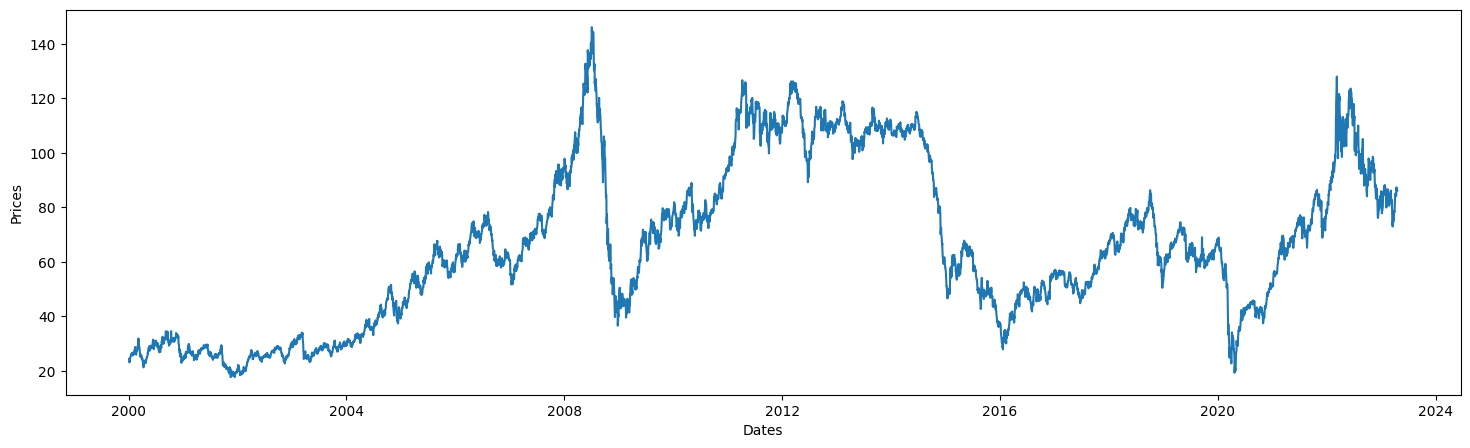

In [8]:
plt.figure(figsize=(18,5))
plt.plot(data['PX_LAST'])
plt.ylabel('Prices')
plt.xlabel('Dates')
plt.show()

The highest crude oil price was USD 143.95 per barrel on July 3, 2008. 
The price then fell sharply due to the recession, but rose again to reach USD 120 per barrel in April 2011.

During the recession caused by the pandemic of the new coronavirus, the price of crude oil dropped to USD 9.12 on April 21, 2020. Subsequently, monetary easing and the effects of the war caused oil prices to soar. The oil prices rise again above USD 120 on 2022 affected by the Ukrainian war.

As we can see, the price of crude oil is very volatile  affected by many external factors such as the word events and it is difficult to say that there is a long-term trend.

In general, The oil prices saw a gradual rise after year 2000 and it is obvious that after year 2008, the already volatile crude oil market have become extremely unpredictable and a high risk
zone. Those events in 2009 and after 2014 caused great calamity on the market and actually caused some major oil companies go bankrupt. This trend supports the idea that correctly predicting future prices is very crucial for major companies.

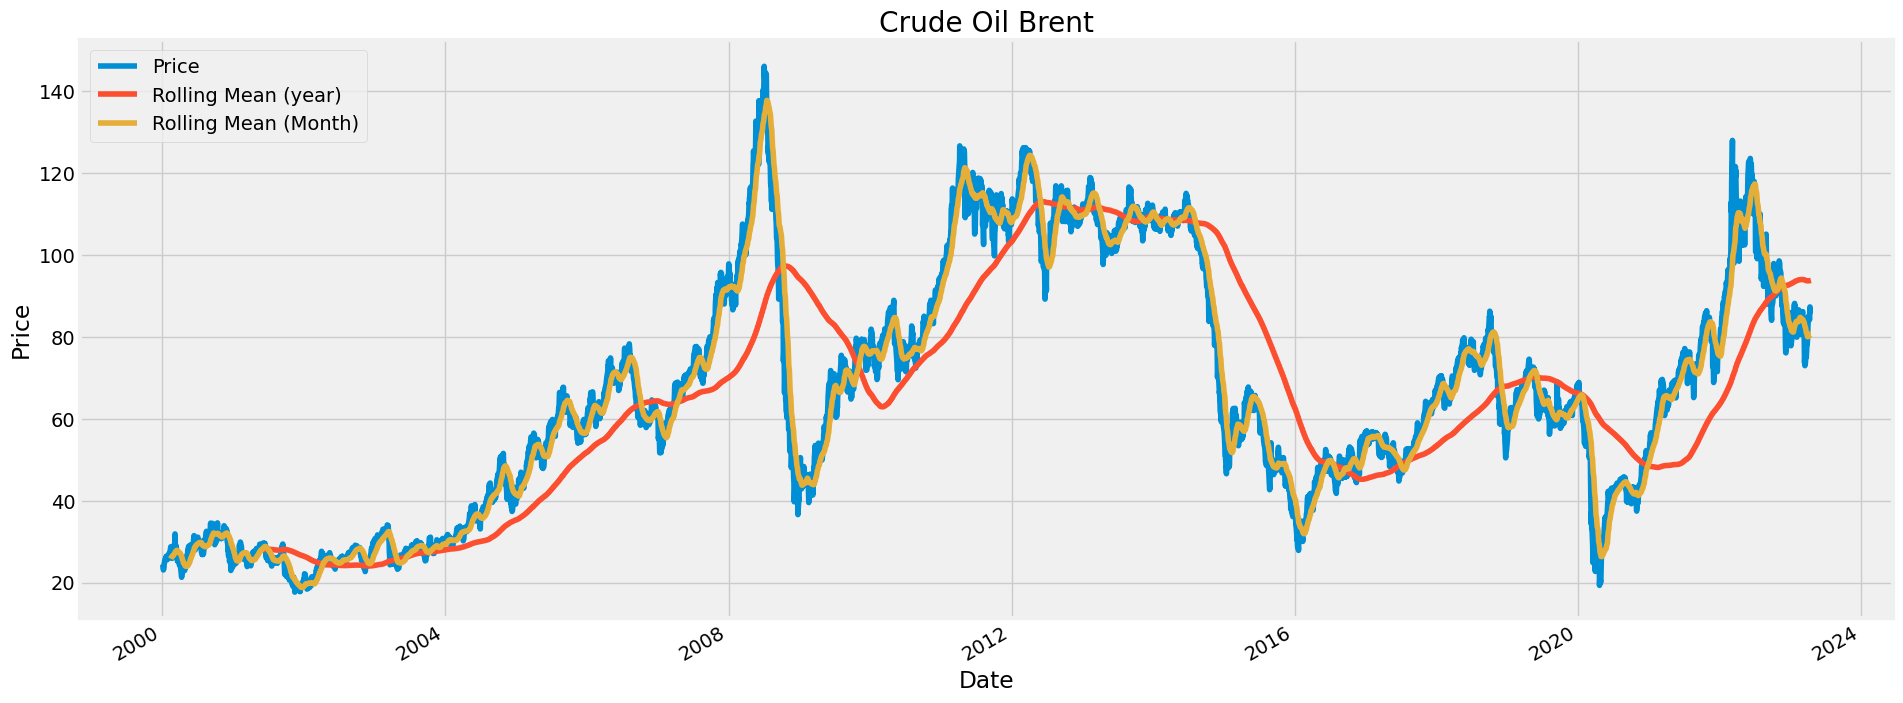

In [9]:
#Rolling Mean
oil_df = data
fig = plt.figure()
plt.style.use('fivethirtyeight')
ax = fig.add_subplot()
ax.plot(oil_df["PX_LAST"],label='Price')
data["PX_LAST"].rolling(360).mean().plot(label='Rolling Mean (year)')
data["PX_LAST"].rolling(30).mean().plot(label='Rolling Mean (Month)')

ax.set_title("Crude Oil Brent")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

<ipython-input-10-4d233eab043d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(oil_df["PX_LAST"],label="Crude Oil",color='dodgerblue').set_title("Distribution Plot of {}".format("Prices"),axes=ax)


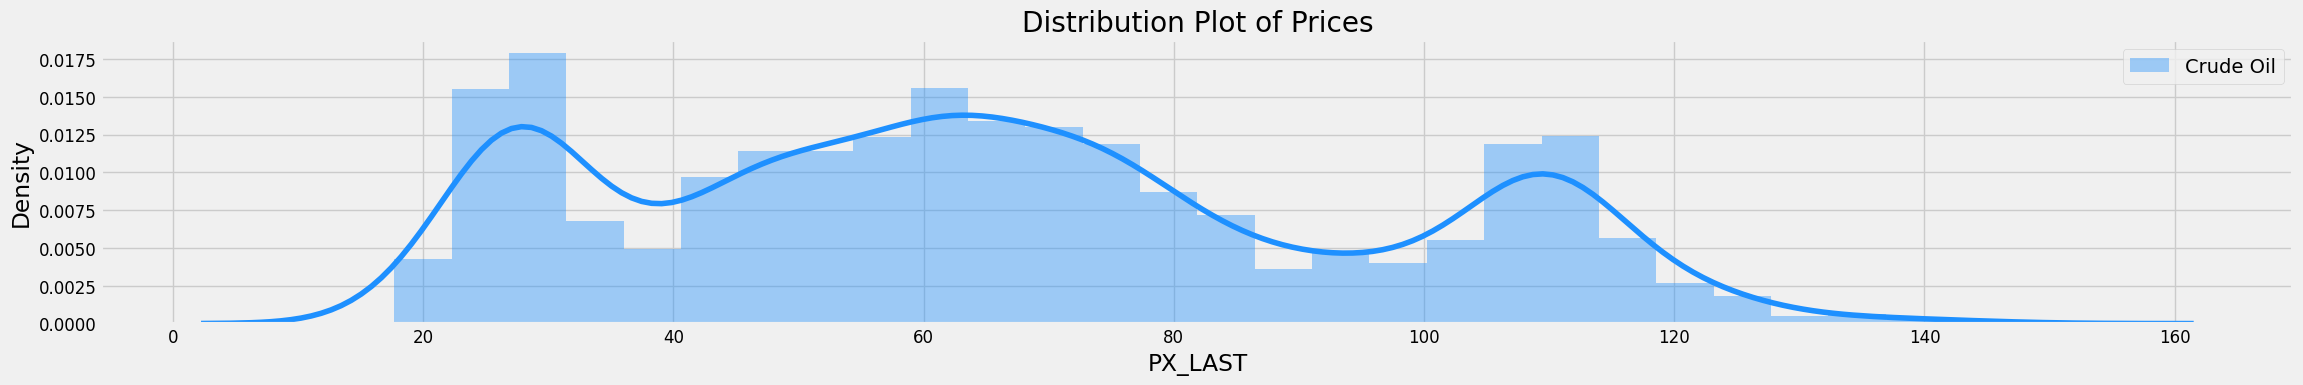

In [10]:
# Prices Distribution
fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
ax = fig.add_subplot(6,1,1)
sns.distplot(oil_df["PX_LAST"],label="Crude Oil",color='dodgerblue').set_title("Distribution Plot of {}".format("Prices"),axes=ax)
ax.tick_params(labelsize=12)
plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

[Text(0.5, 0, 'Prices'),
 Text(0, 0.5, 'frequecey'),
 Text(0.5, 1.0, 'Prices Distribution Plot')]

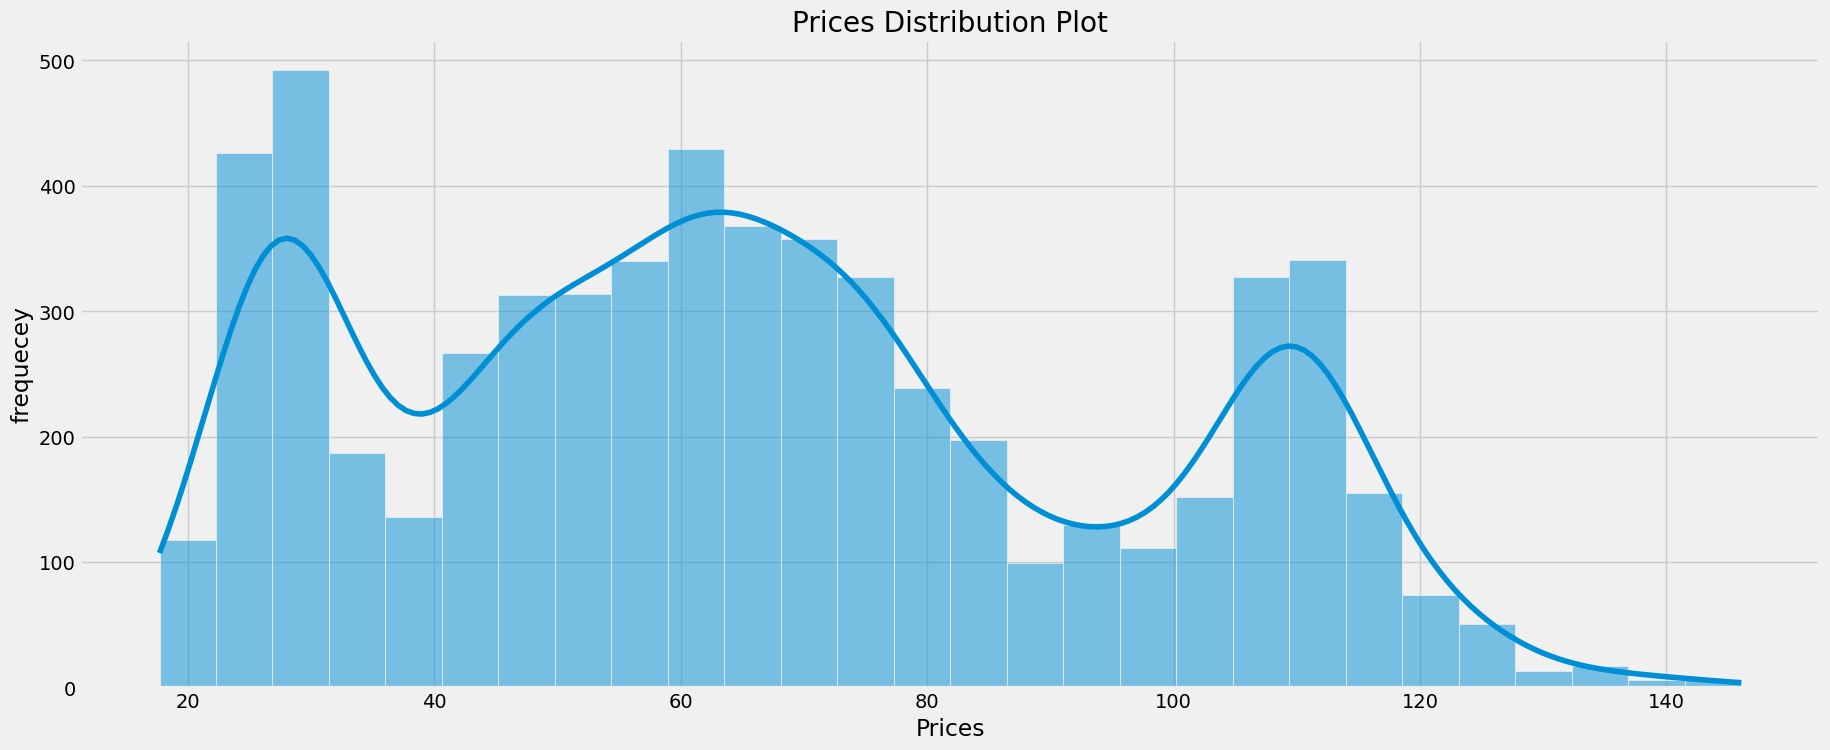

In [11]:
#oil_df.hist('PX_LAST',bins=20 , edgecolor ='black')
sns.histplot(oil_df , x='PX_LAST', kde=True , cbar=True).set(xlabel="Prices" , ylabel="frequecey" , title="Prices Distribution Plot" )

From above Distribution plots :-

*   Most frequent values of Brent Oil are in the range of 25 to 30.
*   The Brent oil price values above 120 are less frequent.
*   Prices don't follow Normal Distribution.





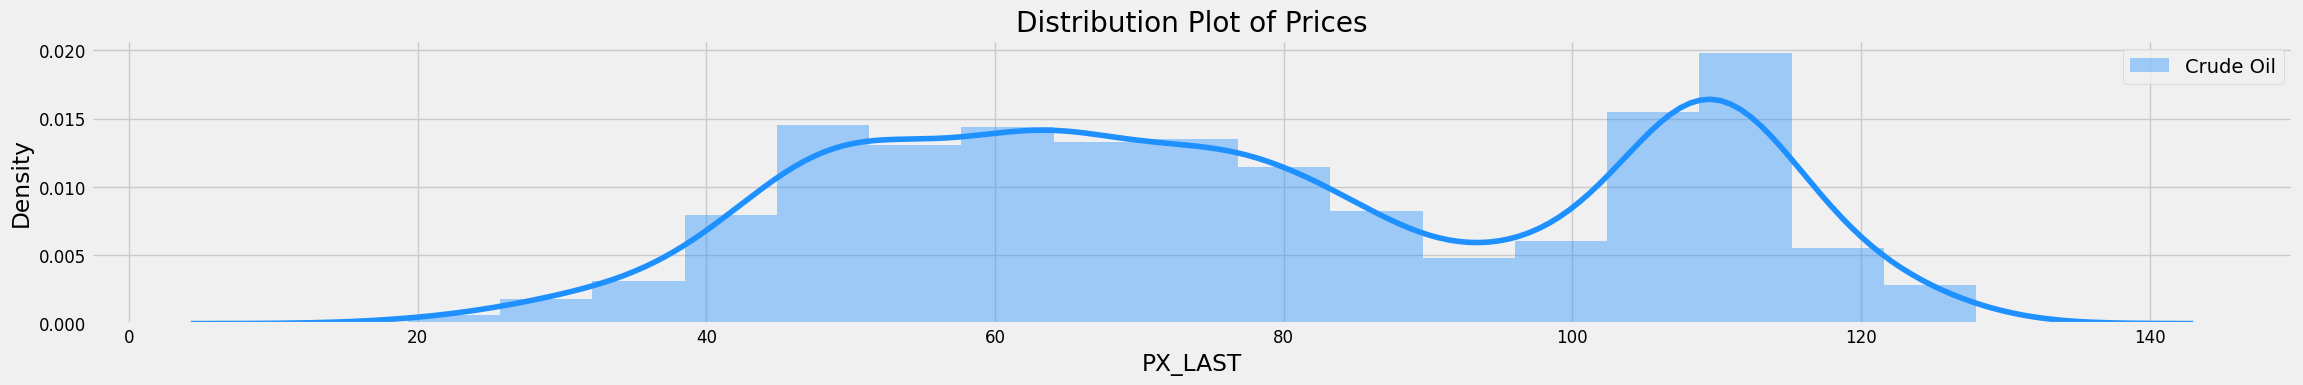

,PX_LAST
count,3431.000000
mean,78.066864
std,25.533097
min,19.330000
25%,56.445000
50%,75.010000
75%,105.325000
max,127.980000


In [12]:
# Prices description and Distribution for(2010 - 2023)
import warnings
warnings.filterwarnings('ignore')
last_13_years=data.loc['2010-01-01':'2023-04-17']
fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
ax1 = fig.add_subplot(6,1,1)
sns.distplot(last_13_years["PX_LAST"],label="Crude Oil",color='dodgerblue').set_title("Distribution Plot of {}".format("Prices"),axes=ax1)
ax1.tick_params(labelsize=12)
plt.legend()
fig.tight_layout(pad=3.0)
plt.show()
last_13_years.describe()

Text(0.5, 1.0, 'Box Plot Year Wise-Brent')

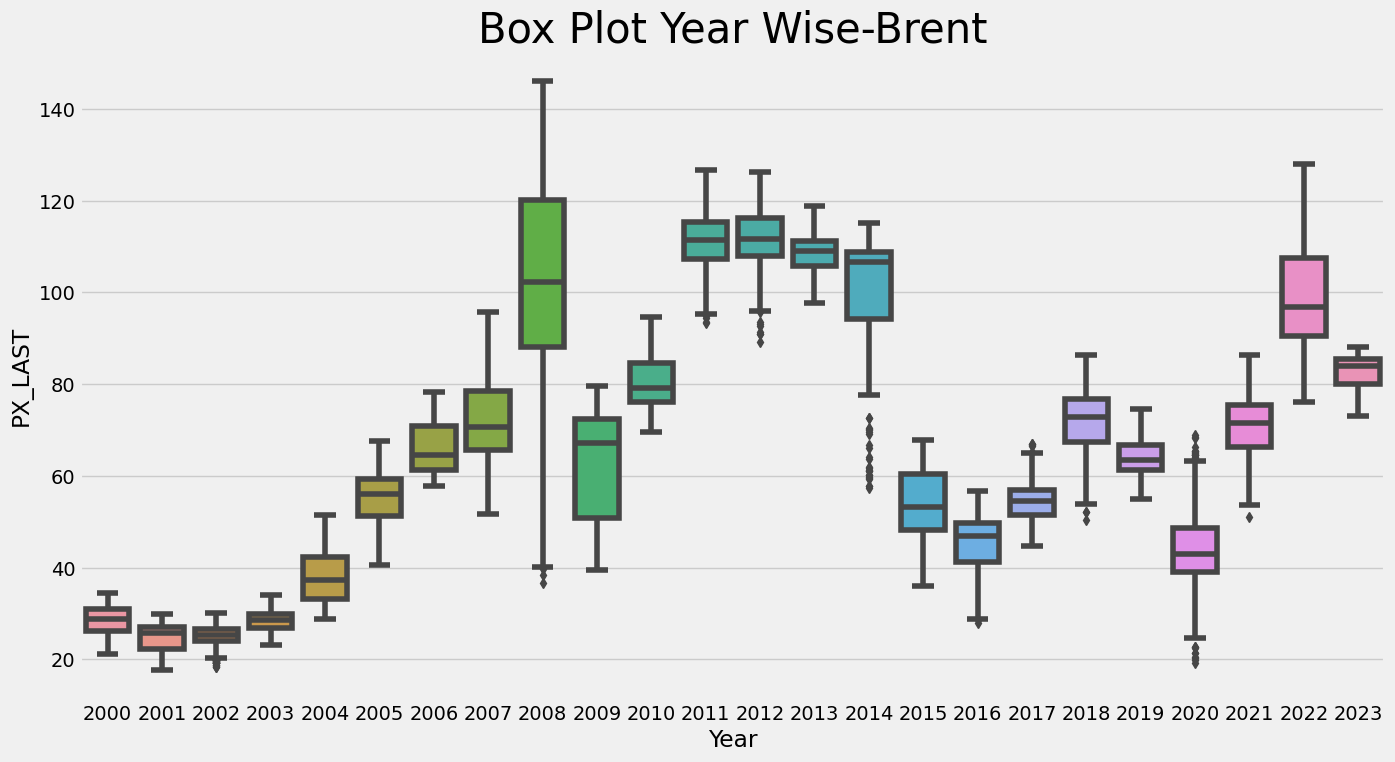

In [13]:
#Box Plot Year Wise Crude Oil
temp_data = oil_df
temp_data['Year'] = oil_df.index.year
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=temp_data['Year'], y=temp_data['PX_LAST'])
ax.set_title('Box Plot Year Wise-Brent',fontsize=30)



*   During the years 2007, 2008, and 2009 wide variations in the values of WTI have been observed.

*   In the year 2008, which is the period of the financial crisis and huge volatality, the WTI oil price varies between 30-140$.


*   Years 2002, 2008, 2014 , 2016 , 2018 & 2020 show outliers.


#Additional Tests

Results of Dickey-Fuller Test:
Test Statistic                   -2.218748
p-value                           0.199512
#Lags Used                       20.000000
Number of Observations Used    5973.000000
Critical Value (1%)              -3.431445
Critical Value (5%)              -2.862024
Critical Value (10%)             -2.567028
dtype: float64


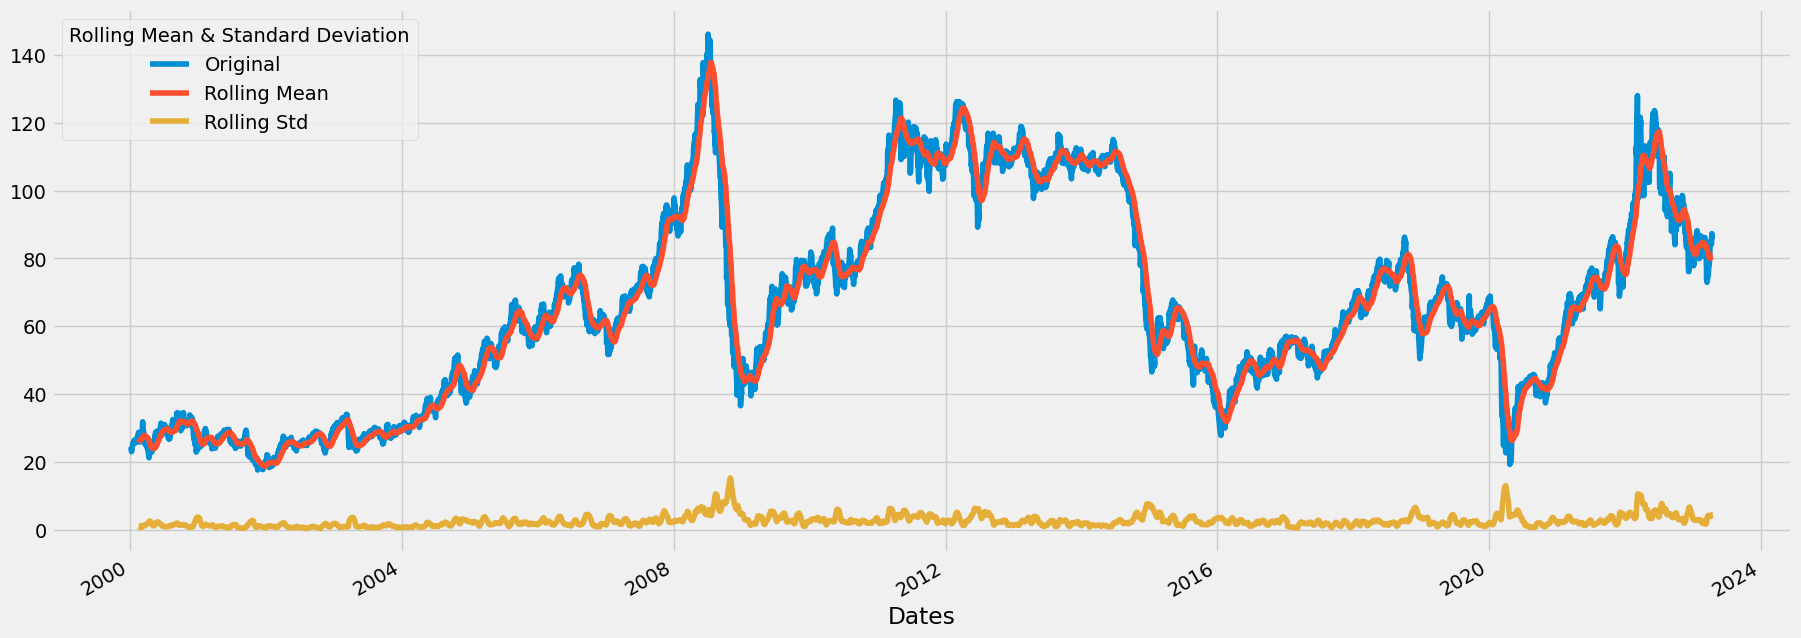

In [14]:
# Perform Augmented Dickey–Fuller test to check if the given Time series is stationary:
from statsmodels.tsa.arima_model import ARIMA    # ARIMA Modeling
from statsmodels.tsa.stattools import adfuller   # Augmented Dickey-Fuller Test for Checking Stationary
from statsmodels.tsa.stattools import acf, pacf  # Finding ARIMA parameters using Autocorrelation
from statsmodels.tsa.seasonal import seasonal_decompose # Decompose the ARIMA Forecast model

def test_stationarity(ts):
    
    #Determing rolling statistics
    ax=ts["PX_LAST"].plot(label='Original')
    ts["PX_LAST"].rolling(window=30).mean().plot(label='Rolling Mean')
    ts["PX_LAST"].rolling(window=30).std().plot(label='Rolling Std')
    ax.legend(loc='best' , title = 'Rolling Mean & Standard Deviation')

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts['PX_LAST'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)



#data.drop(['Year'], axis=1 , inplace=True)
oil_df_2=data
test_stationarity(oil_df_2)

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary

Autocorrelation

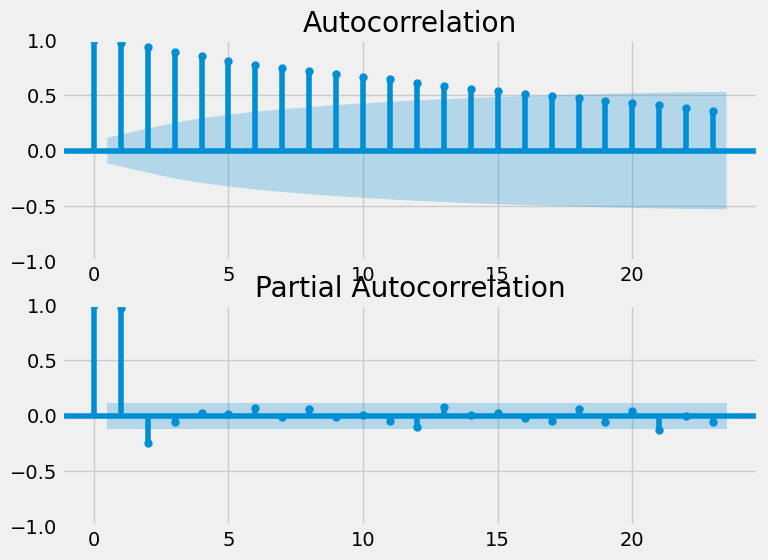

In [15]:
# autocorrelation
import statsmodels.api as sm

#group by month
monthly_data_list = []
year_list = oil_df_2.index.year.unique()
month_list = sorted(oil_df_2.index.month.unique())

for year in year_list:
    for month in month_list:
        last_day_data = oil_df_2[(oil_df_2.index.year == year) &
                               (oil_df_2.index.month == month)].tail(1)
        monthly_data_list.append(last_day_data)
brent_oil_price_monthly = pd.concat(monthly_data_list)
brent_oil_price_monthly.index = pd.to_datetime(brent_oil_price_monthly.index.strftime("%Y-%m"))  
# reset index to YYYY-01-01
brent_oil_price_monthly.tail()

# draw the autocorrelation

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(brent_oil_price_monthly['PX_LAST'], lags=23, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(brent_oil_price_monthly['PX_LAST'], lags=23, ax=ax2)

<Axes: >

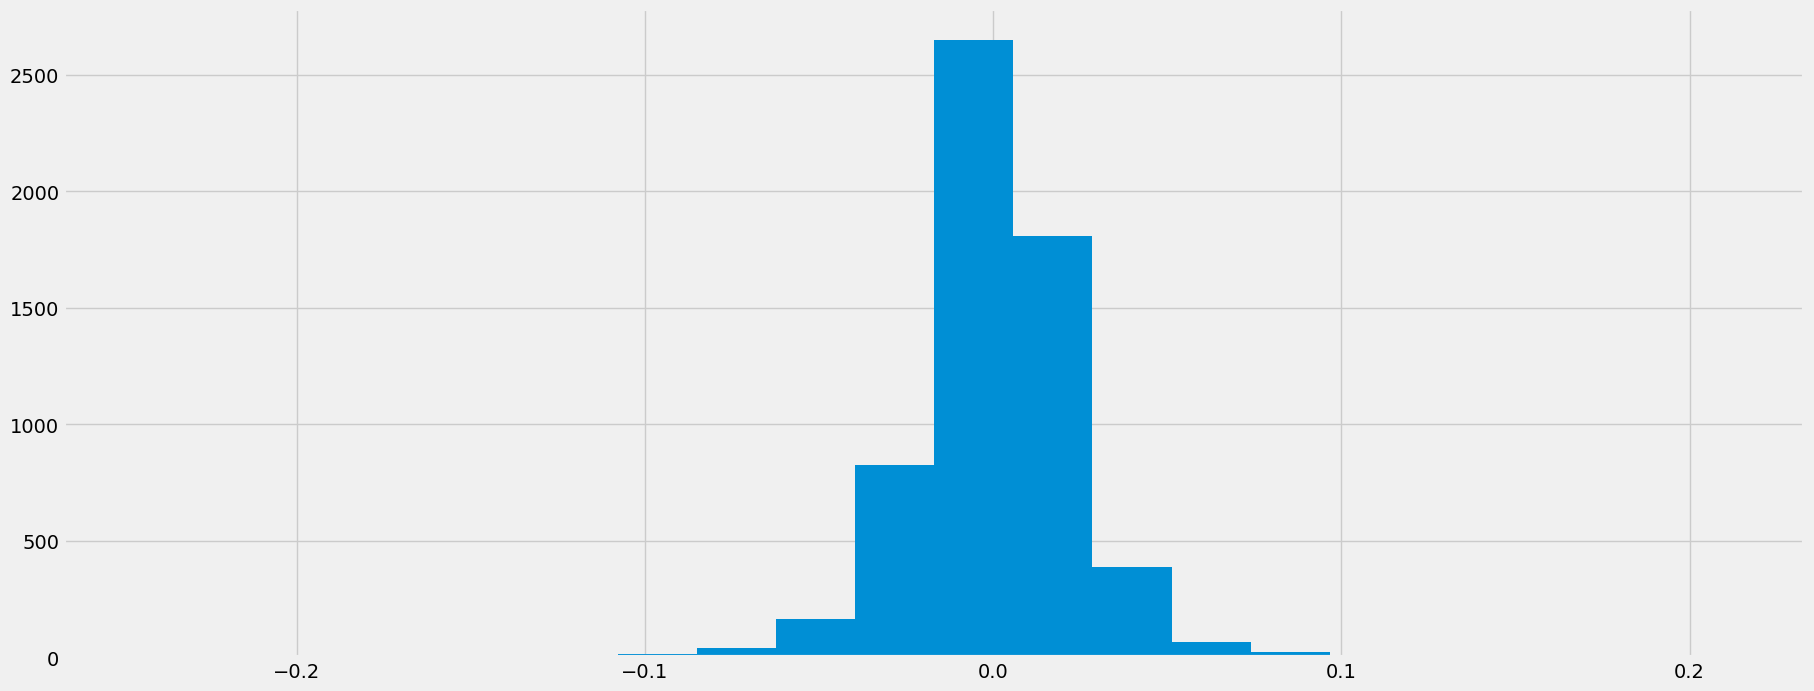

In [16]:
# Percentage Changes in Brent Oil Prices
#Monthly
pc_oil= oil_df['PX_LAST'].pct_change(freq ='M')
#Daily
pc_oil= oil_df['PX_LAST'].pct_change()
pc_oil.hist(bins=20)

Percentage of prices changes

In [17]:
#Percentage of prices changes
print("Min Price for the period 2000 - 2023 is :" , data['PX_LAST'].min(), "Date :", data['PX_LAST'].idxmin())
print("Max Price for the period 2000 - 2023 is:  " , data['PX_LAST'].max(), "Date :", data['PX_LAST'].idxmax())
print("\n")

print("Min and Max prices changes during 2000 to 2023")
print(pc_oil.min() , pc_oil.idxmin() , pc_oil.max() , pc_oil.idxmax())

print("\n")

print("Min and Max prices changes during 2000 to 2010")
before_2010= pc_oil.loc['2000-01-01':'2010-01-01']
print(before_2010.min() , before_2010.idxmin() , before_2010.max() , before_2010.idxmax())

print("\n")

print("Min and Max prices changes during 2010 to 2023")
after_2010= pc_oil.loc['2010-01-01':'2023-04-17']
print(after_2010.min() , after_2010.idxmin() , after_2010.max() , after_2010.idxmax())

Min Price for the period 2000 - 2023 is : 17.68 Date : 2001-11-15 00:00:00
Max Price for the period 2000 - 2023 is:   146.08 Date : 2008-07-03 00:00:00


Min and Max prices changes during 2000 to 2023
-0.2440359796636684 2020-04-21 00:00:00 0.21018593371059024 2020-04-02 00:00:00


Min and Max prices changes during 2000 to 2010
-0.13443396226415105 2001-09-24 00:00:00 0.13549190535491928 2008-12-31 00:00:00


Min and Max prices changes during 2010 to 2023
-0.2440359796636684 2020-04-21 00:00:00 0.21018593371059024 2020-04-02 00:00:00


**Percentage of prices changes**


*Note: we use the (Close) price*




*Period 2010 - 2023:*
The greatest decrease of the prices was on 21 April 2020 becuase Oil storage levels have witnessed sharp increases over the past few weeks, leaving less room for available capacity, with expecation of many countries could easily run out of oil storage space next month. All these were affected by COVID-19 pandemic situation. 
On 02-04-2020, Trump told CNBC’s Joe Kernen Thursday that he spoke to President Putin yesterday and Saudi Crown Prince Thursday and expects them to announce an oil production cut of 10 million barrels and could be up to 15 million.


*Period 2000 to 2010:*
Brent oil prices greatest decrease seemed in 2001–09–21. This day is 10 days after the 9/11 terror attacks in the US. In oilprice.com website there is an analysis about those days sudden drops “September 11, 2001. While the greatest decrease was at December 2018 affected by the critical econimic word crisis. 


Decomposition

**Part 2: Multivariate Features**

#Data combination and prepration

In [18]:
DATAPATH_Features_SP500 = '/content/gdrive/MyDrive/UNIVR/DataSet/WSJ/WSJ SP 500 2000-2023.xlsx'
DATAPATH_Features_USD = '/content/gdrive/MyDrive/UNIVR/DataSet/WSJ/USD Dollar Index (DXY) WSJ.xlsx'
DATAPATH_Features_WTI = '/content/gdrive/MyDrive/UNIVR/DataSet/WSJ/EAI Crude WTI.xlsx'


In [19]:
#import dataset

sp_df= pd.read_excel(DATAPATH_Features_SP500 ,  parse_dates= True)
usd_df= pd.read_excel(DATAPATH_Features_USD ,  parse_dates= True)
wti_df= pd.read_excel(DATAPATH_Features_WTI ,  parse_dates= True)
print(sp_df.info())
print(usd_df.info())
print(wti_df.info())

sp_df.set_index("Dates", inplace=True)
usd_df.set_index("Dates", inplace=True)
wti_df.set_index("Dates", inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Dates              5859 non-null   datetime64[ns]
 1    Open              5859 non-null   float64       
 2    High              5859 non-null   float64       
 3    Low               5859 non-null   float64       
 4   SP500_Close_Price  5859 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 229.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Dates            5989 non-null   datetime64[ns]
 1    Open            5989 non-null   float64       
 2    High            5989 non-null   float64       
 3    Low             5989 non-null   float64       
 4   USD_Close_Pric

In [20]:
#merge the prices of Brent, WTI, SP500 and USD in one dataframe
brent_df=[]
brent_df= data
data_frames=[]
data_frames = [brent_df, wti_df , sp_df, usd_df ]
from functools import reduce
Features=[]
Features = reduce(lambda  left,right: pd.merge(left,right,on=['Dates'],
                                            how='left'), data_frames)
print(Features.head(1))
Features_df=[]
Features_df = Features[['PX_LAST', 'WTI_Price' , 'SP500_Close_Price' , 'USD_Close_Price']]
#Features_df.set_index("Dates", inplace=True)
Features_df.sort_index(ascending=True, inplace=True)
Features_df=Features_df.loc['2000-01-04	' : '2023-04-17']
Features_df.head(3)


            PX_LAST  Year  WTI_Price   Open_x   High_x    Low_x  \
Dates                                                             
2000-01-04    24.39  2000      25.56  1399.42  1455.22  1397.43   

            SP500_Close_Price   Open_y   High_y   Low_y  USD_Close_Price  
Dates                                                                     
2000-01-04            1399.42   100.55   100.86  100.01           100.44  


,PX_LAST,WTI_Price,SP500_Close_Price,USD_Close_Price
Dates,,,,
2000-01-04,24.39,25.56,1399.42,100.44
2000-01-05,23.73,24.65,1402.11,100.39
2000-01-06,23.62,24.79,1403.45,100.55


In [21]:
#Features_df['Brent']=Features_df['PX_LAST']
#Features_df.insert(1, 'Brent_Oil', Features_df['PX_LAST'])
Features_df.rename(columns={'PX_LAST': 'Brent_Oil'}, inplace=True)

Features_df.head()

,Brent_Oil,WTI_Price,SP500_Close_Price,USD_Close_Price
Dates,,,,
2000-01-04,24.39,25.56,1399.42,100.44
2000-01-05,23.73,24.65,1402.11,100.39
2000-01-06,23.62,24.79,1403.45,100.55
2000-01-07,23.09,24.79,1441.47,100.83
2000-01-10,23.73,24.71,1457.60,101.01


In [22]:
#Data Exploratory
Features_df.isnull().sum()
Features_df = Features_df.fillna(method='ffill')
Features_df.isnull().sum()
Features_df.describe()

,Brent_Oil,WTI_Price,SP500_Close_Price,USD_Close_Price
count,5994.000000,5994.000000,5994.000000,5994.000000
mean,66.105077,62.785762,1902.473814,91.706195
std,29.319883,26.051607,989.833999,11.328217
min,17.680000,-36.980000,676.530000,71.330000
25%,43.300000,41.822500,1185.877500,81.940000
50%,63.315000,60.055000,1439.275000,91.170000
75%,86.150000,82.852500,2429.375000,98.007500
max,146.080000,145.310000,4796.560000,120.920000


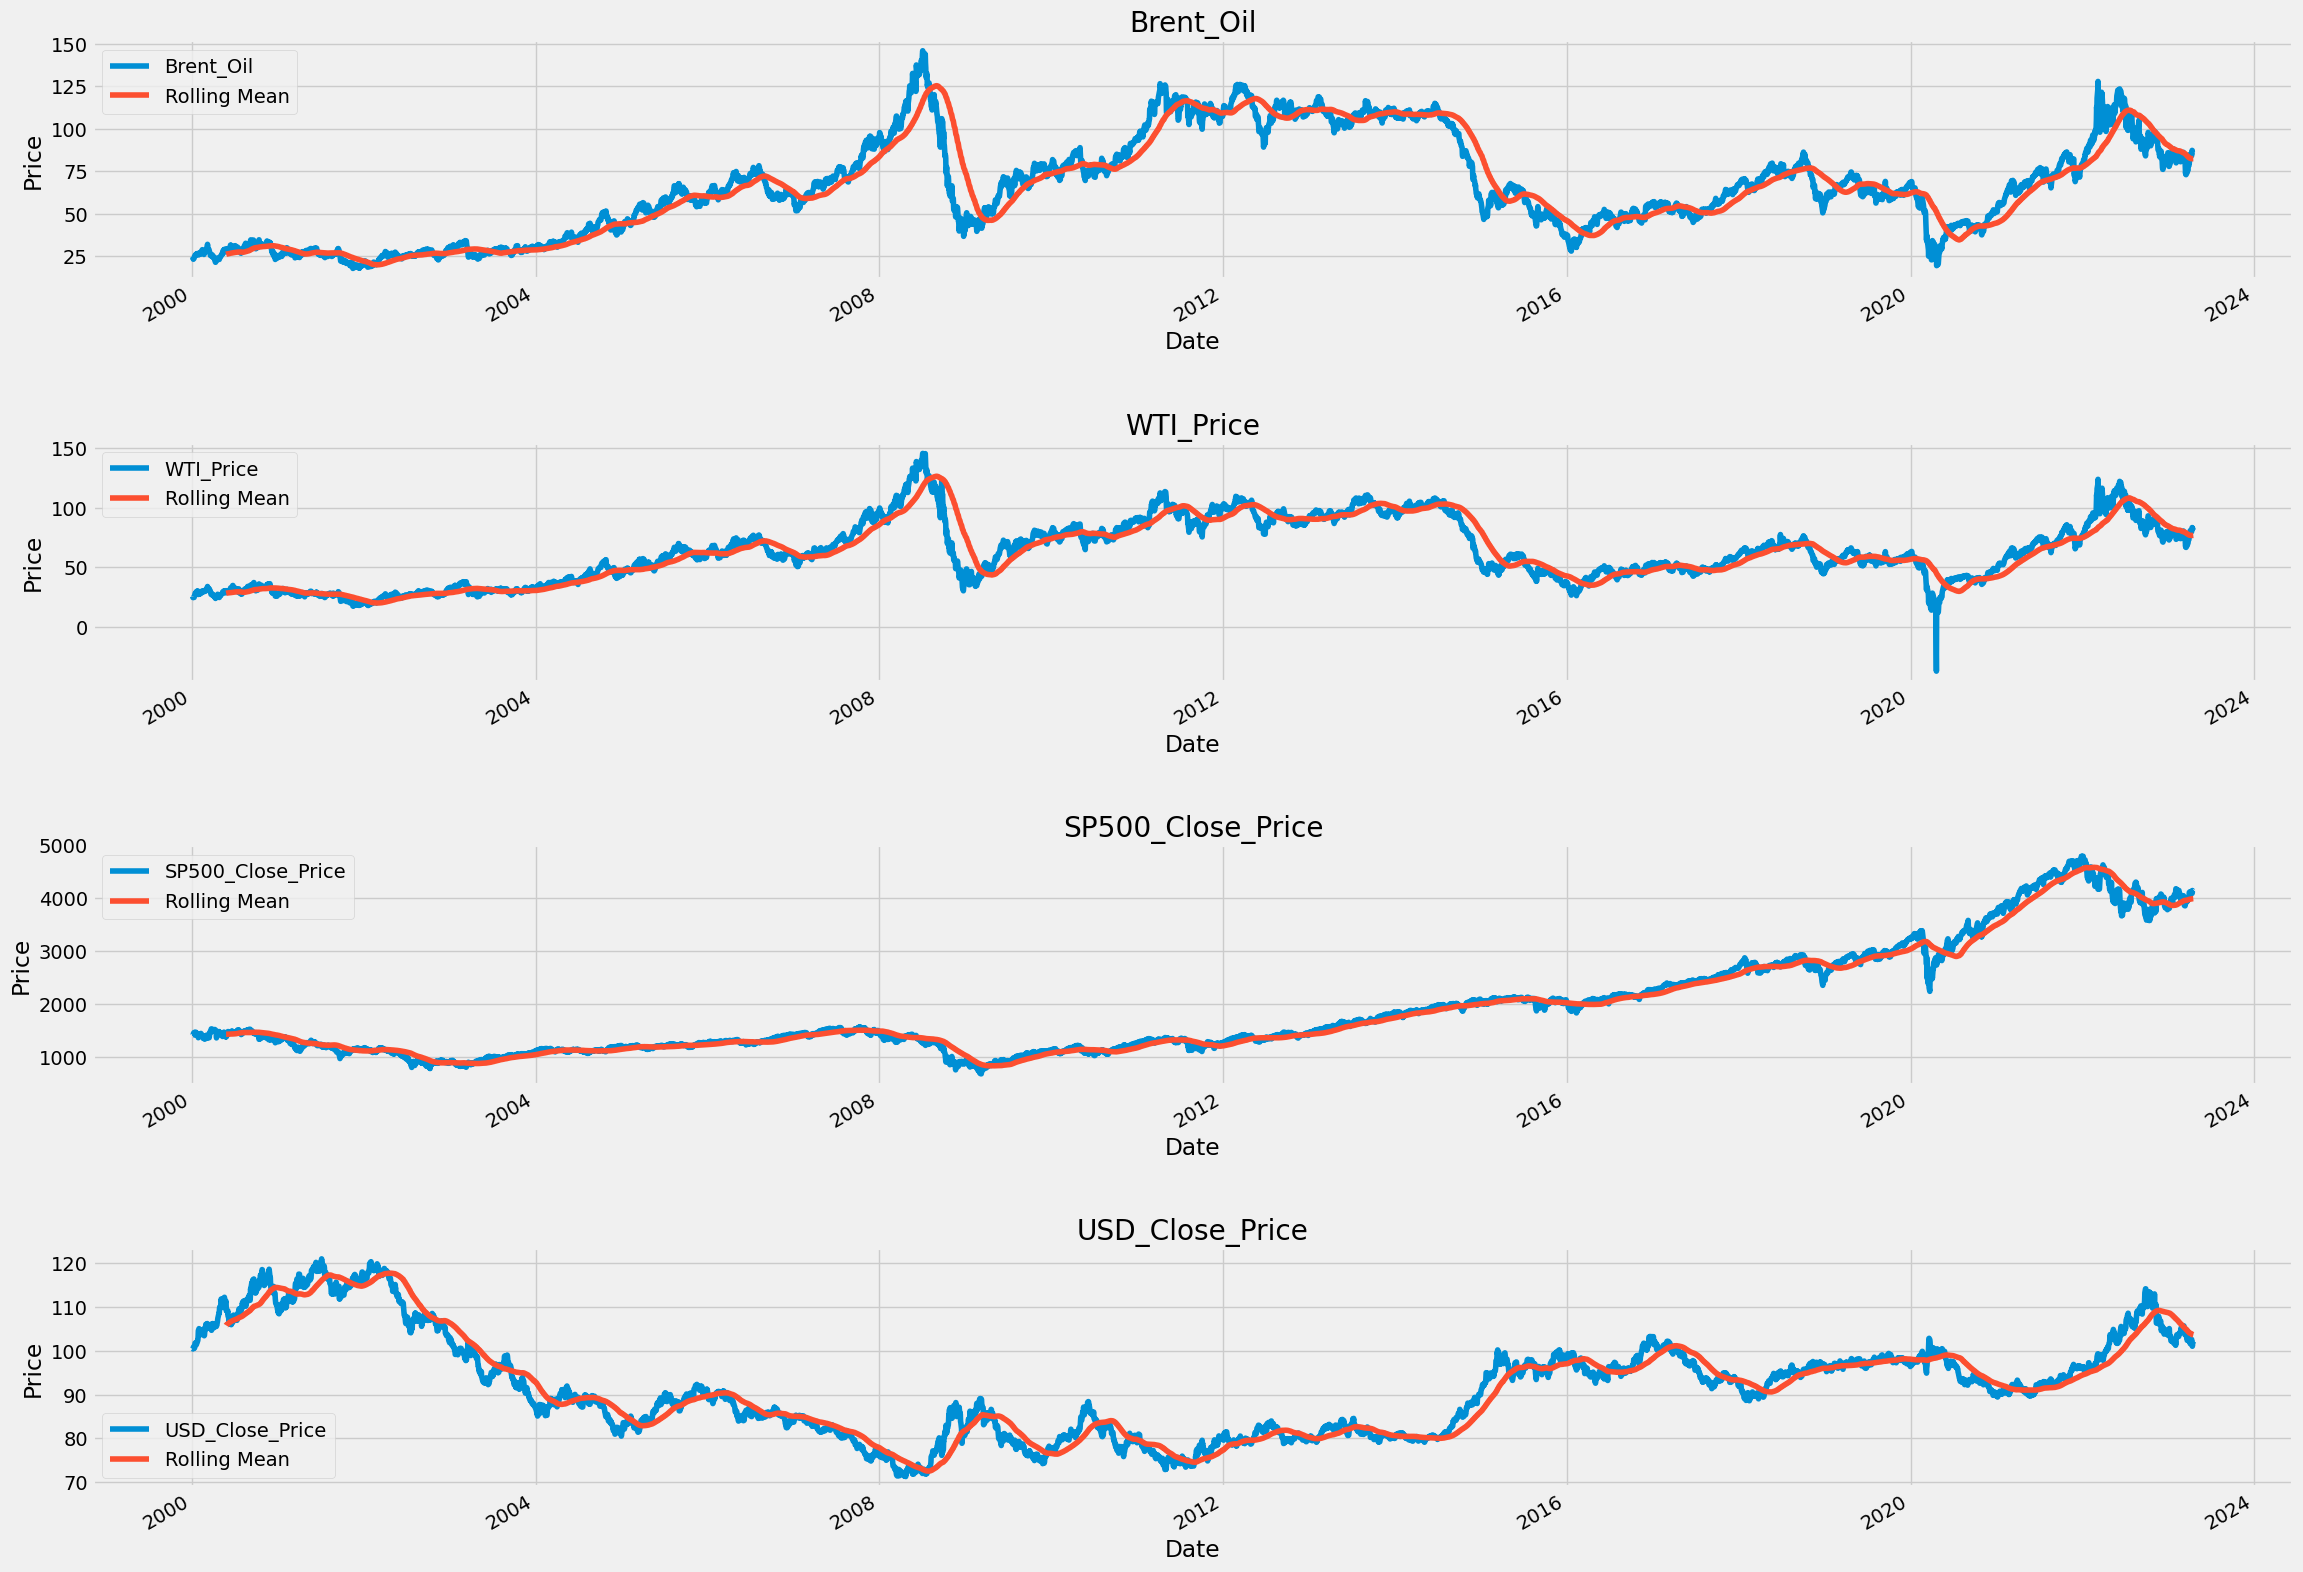

In [25]:
#Line Plots Target & Features
data_df = Features_df

col_names = data_df.columns

fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
for i in range(4):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data_df.iloc[:,i],label=col_names[i])
  data_df.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()
     

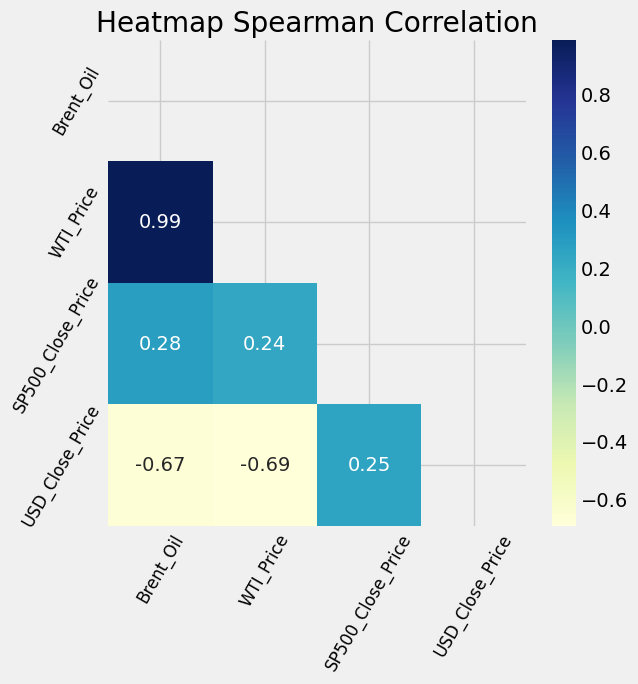

In [27]:
#HeatMap Spearman Correlation
plt.figure(figsize=(6,6))
matrix = np.triu(data_df.corr(method='spearman'))
heat_map = sns.heatmap(data_df.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')
plt.style.use('fivethirtyeight')


*   The highest positive correlation with target variable Brent Oil is with WTI Oil(ρ:0.99)
*   signficant inversely correlation between USD and the crude Oil (WTI/Brent)





In [28]:
data_df.corr(method='spearman')


,Brent_Oil,WTI_Price,SP500_Close_Price,USD_Close_Price
Brent_Oil,1.000000,0.987671,0.284676,-0.668507
WTI_Price,0.987671,1.000000,0.238802,-0.691612
SP500_Close_Price,0.284676,0.238802,1.000000,0.248467
USD_Close_Price,-0.668507,-0.691612,0.248467,1.000000
